# Set environment

In [1]:
source("config_deseq.R")
source("util_deseq.R")

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘foreach’

The following objects are masked from ‘package:purrr’:

    accumulate, when

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following o

# Import data

In [2]:
# import RData (annomapres0, annogenecnts0)
#attach(file.path(OUTDIR, "HTS-GroupB-Annotated-STAR-counts.RData"))
#attach(file.path(OUTDIR, "HTS-GroupB-DESeq.RData"))
attach(file.path(OUTDIR, "HTS-GroupAll-Annotated-STAR-counts.RData"))
attach(file.path(OUTDIR, "HTS-GroupAll-DESeq.RData"))

# Dendrogram (Hierachical Clustering)

In [3]:
mydend <- lapply(gene_exp, function(mat){
    # construct the dendrogram
    mydend <- mat %>% t() %>% dist %>%
    hclust(method = "complete") %>%
    as.dendrogram
    
    return(mydend)
})  

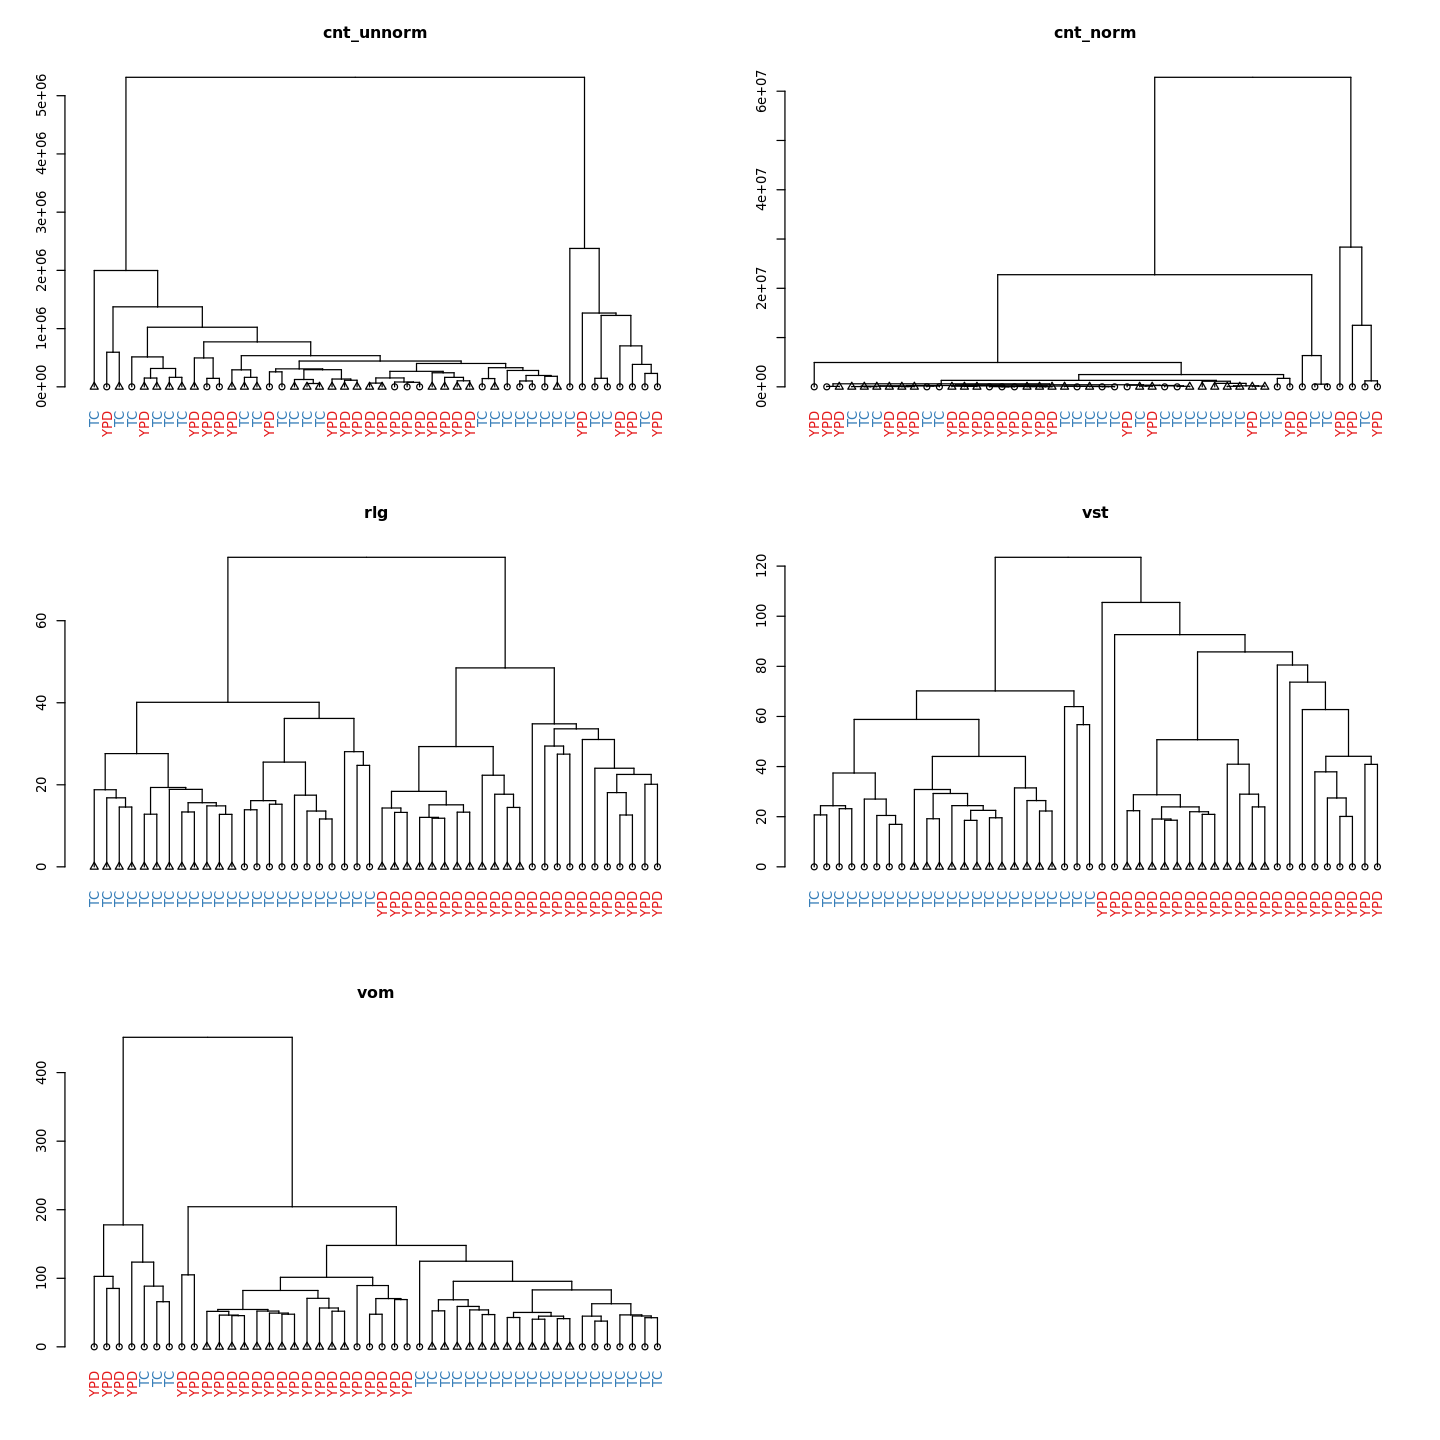

In [6]:
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(3, 2))
for (name in names(mydend)){
    dend <- mydend[[name]]
    plot(dendplot(dend, columnData_rmF, "Media", "Media", "Strain"),
        main = name)
    
}
par(mfrow = c(1, 1))

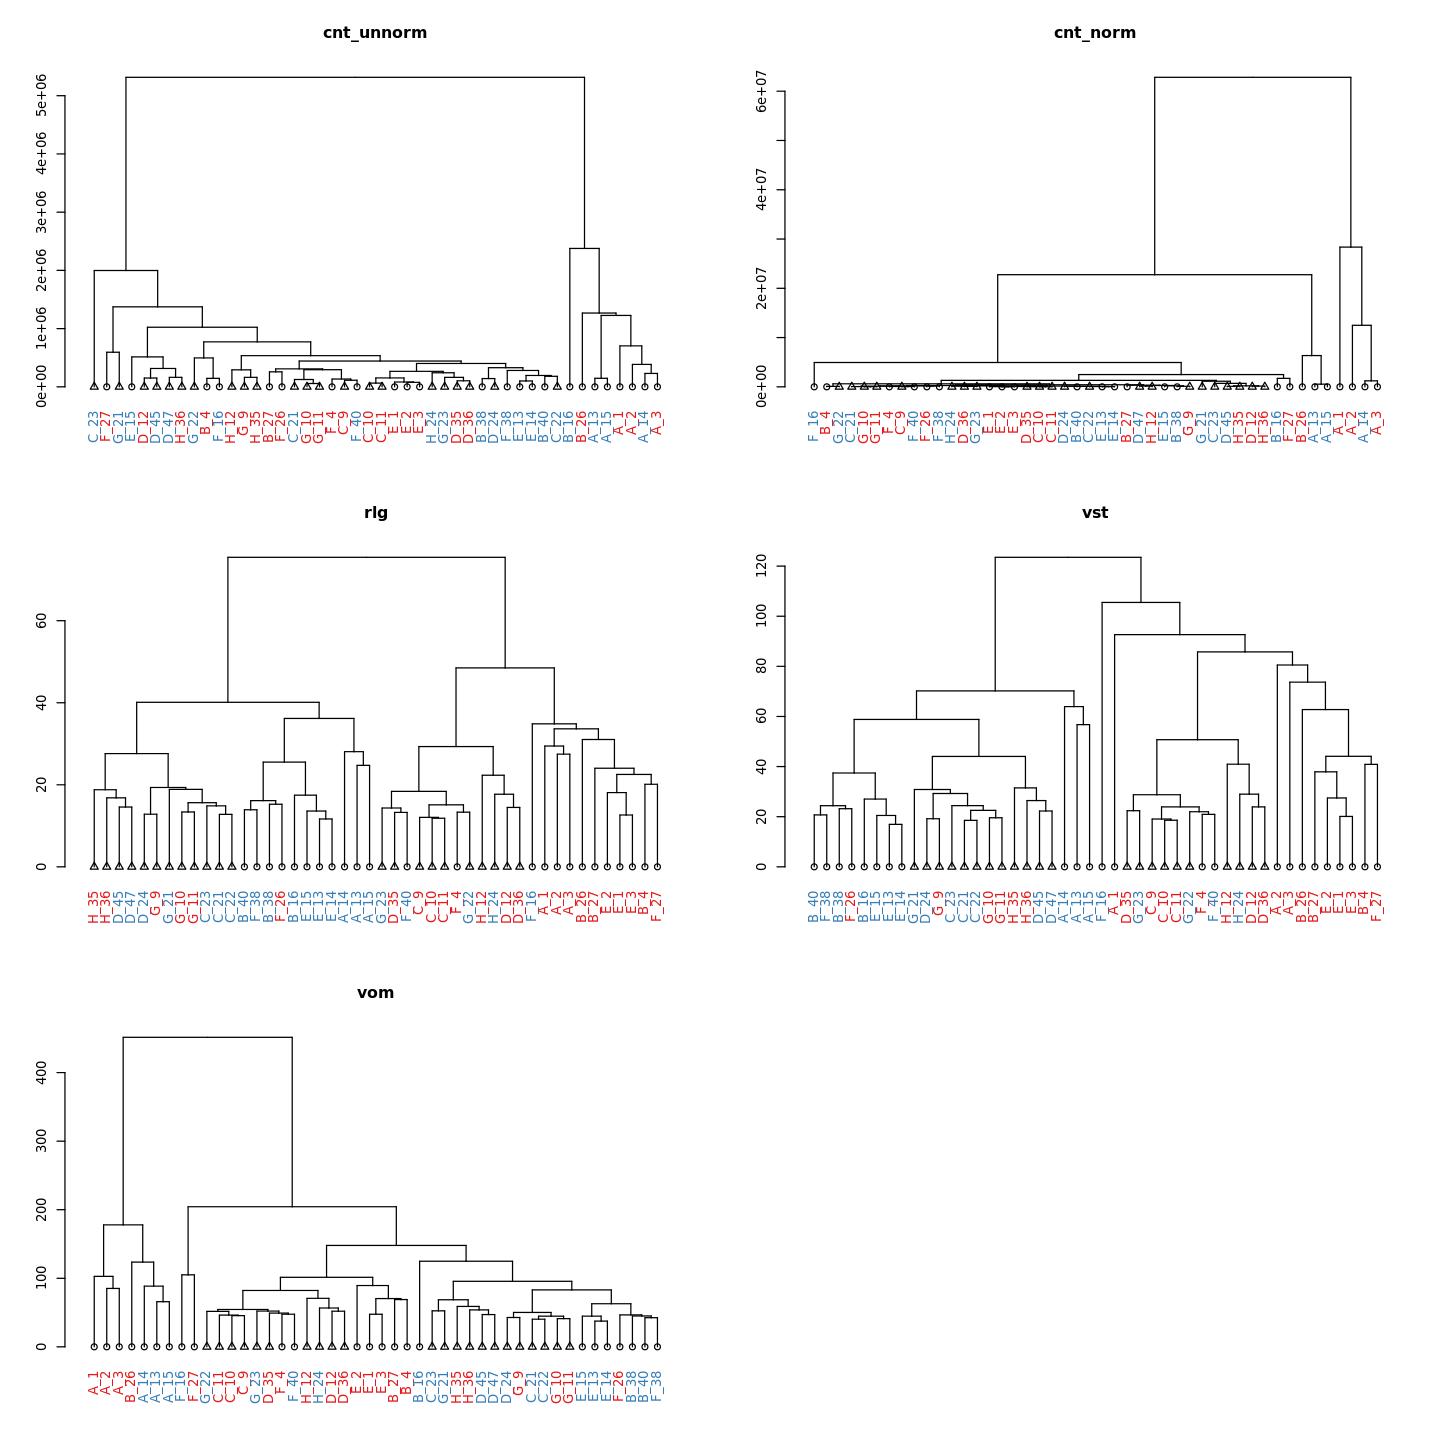

In [7]:
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(3, 2))
for (name in names(mydend)){
    dend <- mydend[[name]]
    plot(dendplot(dend, columnData, "Label", "Media", "Strain"),
        main = name)
    
}
par(mfrow = c(1, 1))

# Dimensional Reduction (PCA)

In [6]:
annomapres0

Label,Strain,Media,experiment_person,prop.gene,prop.nofeat,prop.unique,depth
A_1,H99,YPD,expA,0.61518986,0.03635624,0.6515461,3109311.5
A_13,H99,TC,expA,0.64766375,0.05793771,0.7056015,2436038.5
A_14,H99,TC,expA,0.62701560,0.05659609,0.6836117,2802332.0
A_15,H99,TC,expA,0.62377294,0.06518918,0.6889621,2449520.0
A_2,H99,YPD,expA,0.61452191,0.04734133,0.6618632,2809211.5
A_3,H99,YPD,expA,0.63199602,0.04088589,0.6728819,2688939.0
B_16,H99,TC,expA,0.68282811,0.15846630,0.8412944,2999313.0
B_26,H99,YPD,expB,0.60502413,0.06762182,0.6726459,3036191.8
B_27,H99,YPD,expB,0.55616916,0.30984824,0.8660174,2766512.5
B_38,H99,TC,expB,0.57734483,0.35963998,0.9369848,2889269.8


In [7]:
### plotting theme
### from http://huboqiang.cn/2016/03/03/RscatterPlotPCA
theme<-theme(panel.background = element_blank(),panel.border=element_rect(fill=NA),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),strip.background=element_blank(),axis.text.x=element_text(colour="black"),axis.text.y=element_text(colour="black"),axis.ticks=element_line(colour="black"),plot.margin=unit(c(1,1,1,1),"line"))

###
gps_PCA <- lapply(names(gene_exp), function(name){
    #
    mat <- gene_exp[[name]]
    
    #
    df_pca <- prcomp(t(mat))
    df_out <- as.data.frame(df_pca$x)
    df_out <- df_out %>% rownames_to_column("Label")

    #
    df_out <- annomapres0 %>% 
        as.data.frame %>%
        select(Label, Media) %>% 
        left_join(df_out, ., by = "Label")
    
    #
    percentage <- round(df_pca$sdev / sum(df_pca$sdev) * 100, 2)
    percentage <- paste(c("PC1", "PC2"), "(", paste(as.character(percentage), "%", " )", sep="") )

    #
    gp <- ggplot(df_out, aes(x = PC1, y = PC2, color = Media))
    gp <- gp + geom_point() + theme + xlab(percentage[1]) + ylab(percentage[2]) + ggtitle(name)
    return(gp)
})

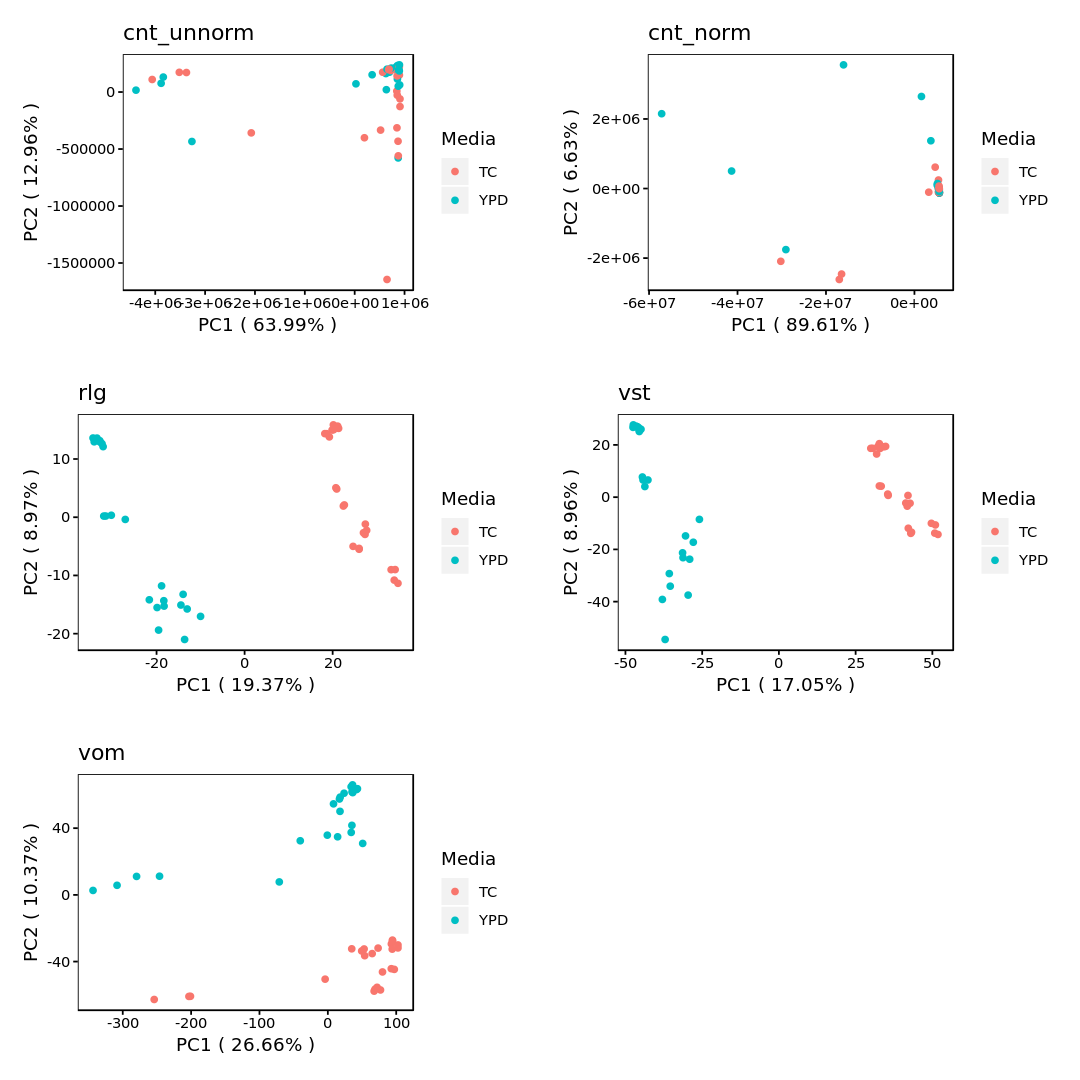

In [8]:
options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(
    gps_PCA[[1]], gps_PCA[[2]], 
    gps_PCA[[3]], gps_PCA[[4]],
    gps_PCA[[5]],
    ncol = 2)

# EDA: Mean vs SD

In [9]:
names(gene_exp)

[1] "cnt_unnorm" "cnt_norm"   "rlg"        "vst"        "vom"

In [10]:
gene_mean_sd <- lapply(gene_exp, function(mat){
    dat <- mat %>% 
        as.data.frame %>% 
        rownames_to_column("Label") %>%
        group_by(Label) %>%
        mutate(
            Mean = mean(c(B_16, B_26, B_27, B_38, B_4, B_40)), 
            SD   = sd(  c(B_16, B_26, B_27, B_38, B_4, B_40)))
    return(dat)
}) # end lapply

names(gene_mean_sd)

[1] "cnt_unnorm" "cnt_norm"   "rlg"        "vst"        "vom"

In [11]:
gps <- lapply(names(gene_mean_sd), function(name){
    dat <- gene_mean_sd[[name]]
    gp  <- ggplot(dat, aes(x = rank(Mean), y = SD))
    gp  <- gp + 
        geom_bin2d() + 
        geom_smooth(method = "loess", color = "red") +
        ggtitle(name)
    return(gp)
})
names(gps) <- names(gene_exp)

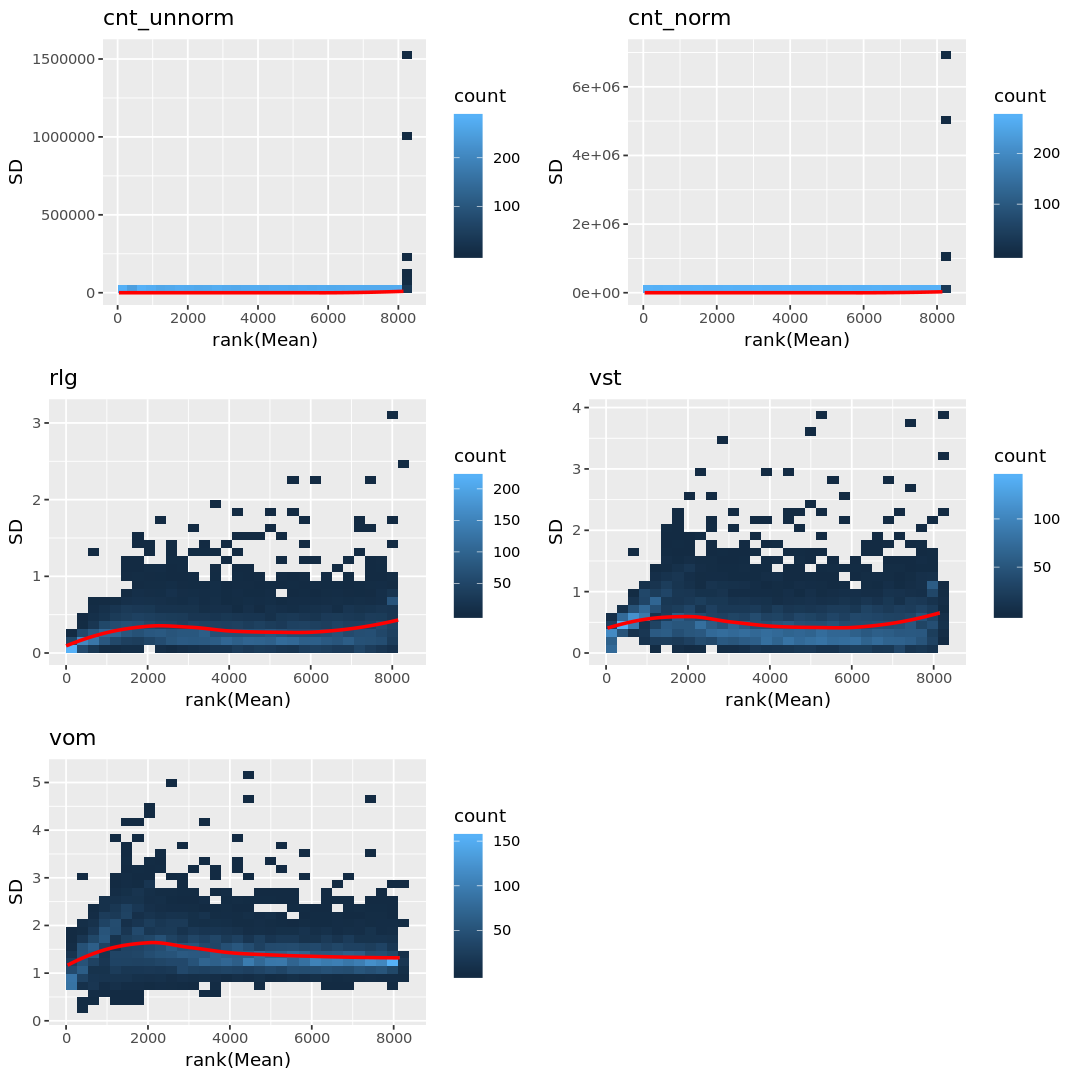

In [12]:
options(repr.plot.width = 9, repr.plot.height = 9)
grid.arrange(
    gps[['cnt_unnorm']], gps[['cnt_norm']],
    gps[['rlg']],        gps[['vst']], 
    gps[['vom']],        ncol = 2)

----

# Volcano plot

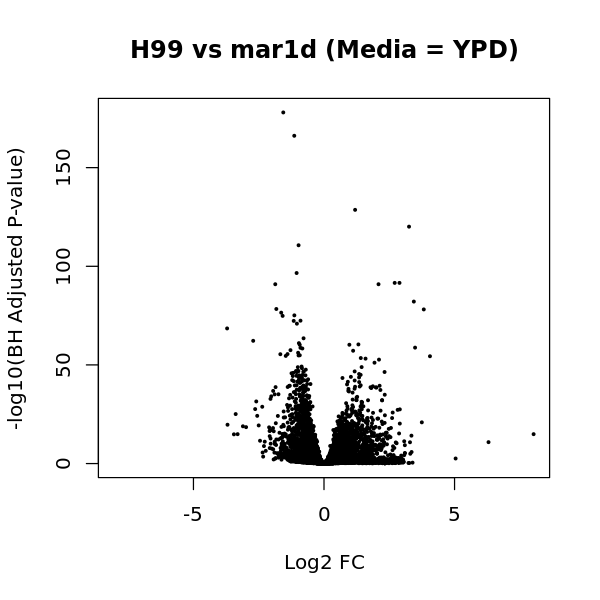

In [10]:
res <- res_strain_ypd

options(repr.plot.width = 5, repr.plot.height = 5)
plot(res$log2FoldChange,
     -log10(res$padj),
     pch  = 19,
     cex  = 0.3,
     xlab = "Log2 FC",
     ylab = "-log10(BH Adjusted P-value)",
     #col  = ifelse(
     #    (res$padj < 0.05) & 
     #    (abs(res$log2FoldChange) > 1),
     #   "red", "black"),
     xlim = c(-8, 8),
    main = "H99 vs mar1d (Media = YPD)")

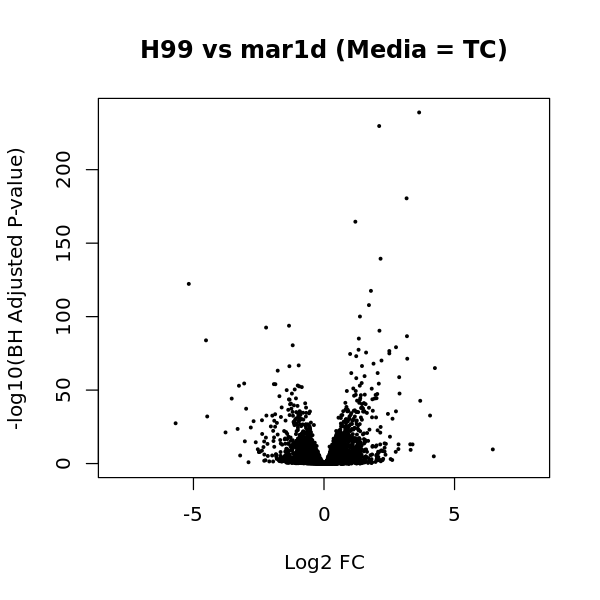

In [11]:
res <- res_strain_tc

options(repr.plot.width = 5, repr.plot.height = 5)
plot(res$log2FoldChange,
     -log10(res$padj),
     pch  = 19,
     cex  = 0.3,
     xlab = "Log2 FC",
     ylab = "-log10(BH Adjusted P-value)",
     #col  = ifelse(
     #    (res$padj < 0.05) & 
     #    (abs(res$log2FoldChange) > 1),
     #   "red", "black"),
     xlim = c(-8, 8),
    main = "H99 vs mar1d (Media = TC)")

In [ ]:
res <- res_media

options(repr.plot.width = 5, repr.plot.height = 5)
dat <- tibble(
    genename = res$row,
    x = res$log2FoldChange,
    y = -log10(res$padj),
    col = ifelse(
        (res$padj < 0.05) & 
        (abs(res$log2FoldChange) > 2),
        "significant", "non-significant"))

plot_ly(dat, x = ~x, y = ~y, color = ~col,
        text = ~genename, #hoverinfo="text",
        type = "scatter", mode = "markers")